In [1]:
import numpy as np
import cv2 as cv
import matplotlib.pyplot as plt
import os

# Parte I

## 1.1

In [2]:
img_1 = cv.imread("coord_cromaticas/CoordCrom_1.png")
img_2 = cv.imread("coord_cromaticas/CoordCrom_2.png")
img_3 = cv.imread("coord_cromaticas/CoordCrom_3.png")

In [3]:
def  chromatic_coordinates(image:np.array) -> np.ndarray:
    
    image_chromatic = np.zeros(image.shape)
    height, width = image.shape[0:2]
    
    for x in range(0, width):
        for y in range(0, height):
            
            pixel = image[y, x]
            R, G, B = pixel
            
            if sum(pixel) != 0:
                image_chromatic[y,x] = [R / sum(pixel), G / sum(pixel), B / sum(pixel)]
            else:
                image_chromatic[y,x] = 0.0
    
    image_chromatic = image_chromatic * 255
    return image_chromatic.astype('uint8')                                                                                   

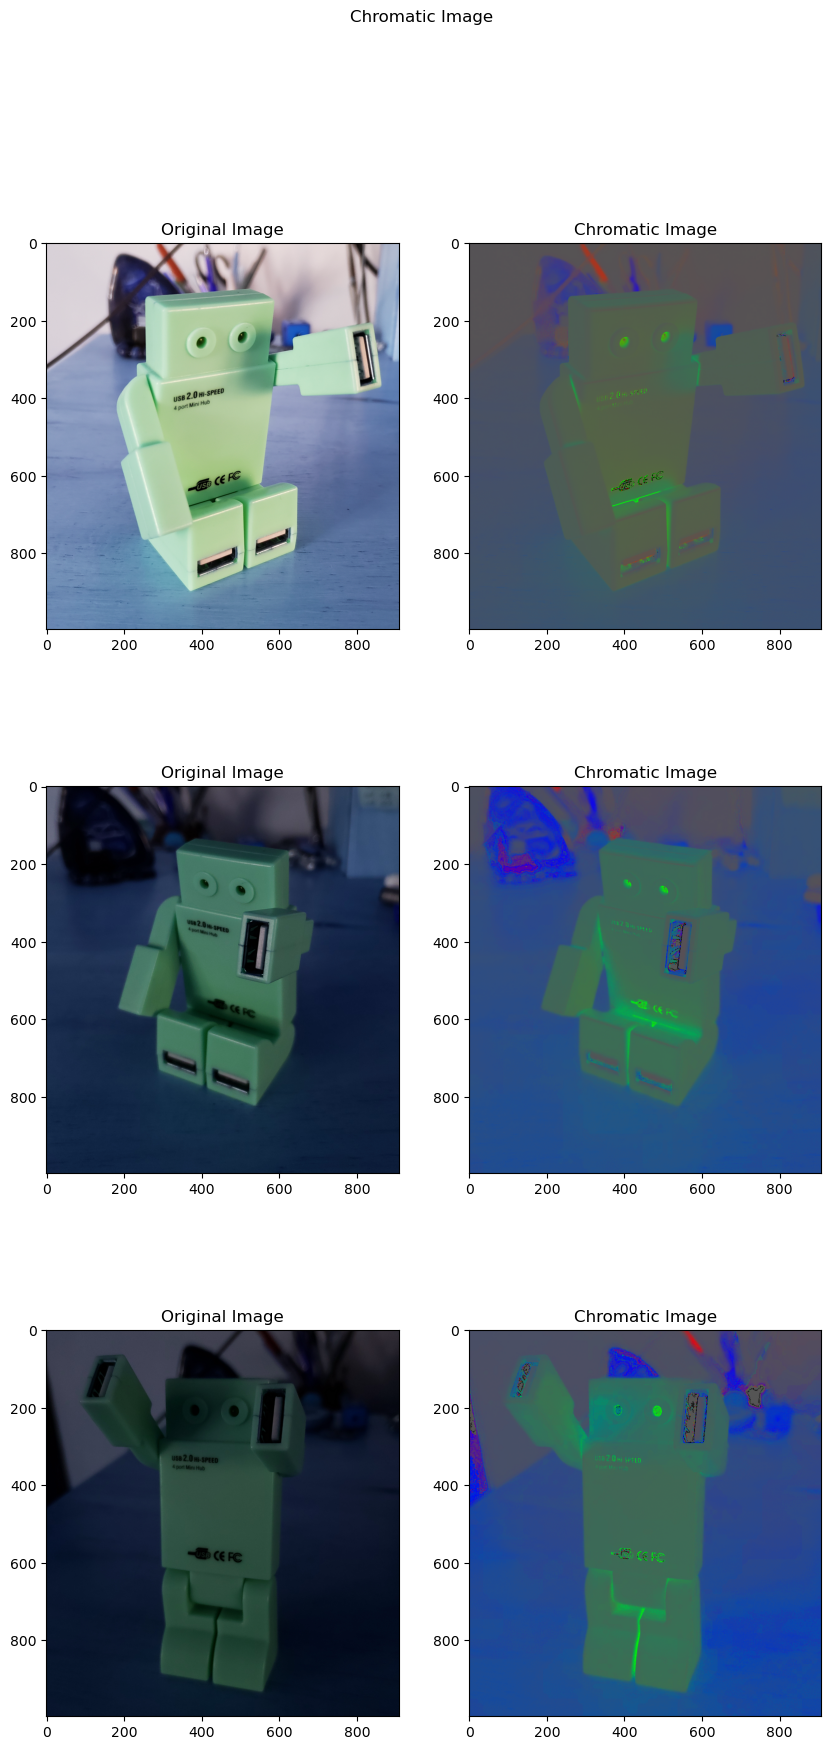

In [4]:
fig, axs = plt.subplots(3,2, figsize=(10,20))
fig.suptitle('Chromatic Image')

axs[0, 0].imshow(img_1)
axs[0, 0].set_title('Original Image')
axs[0, 1].imshow(chromatic_coordinates(img_1))
axs[0, 1].set_title('Chromatic Image')

axs[1, 0].imshow(img_2)
axs[1, 0].set_title('Original Image')
axs[1, 1].imshow(chromatic_coordinates(img_2))
axs[1, 1].set_title('Chromatic Image')

axs[2, 0].imshow(img_3)
axs[2, 0].set_title('Original Image')
axs[2, 1].imshow(chromatic_coordinates(img_3))
axs[2, 1].set_title('Chromatic Image')
plt.show()

## 1.2

In [5]:
def white_patch(image:np.ndarray) -> np.ndarray:

    image_final = image.astype(float) / image.max(axis=(0,1))
    image_final = image_final * 255
    
    return image_final.astype('uint8')  

In [6]:
img = cv.imread("white_patch/wp_blue.jpg")
img = cv.cvtColor(img, cv.COLOR_BGR2RGB)

In [7]:
filenames = os.listdir('white_patch')
directory = 'white_patch'

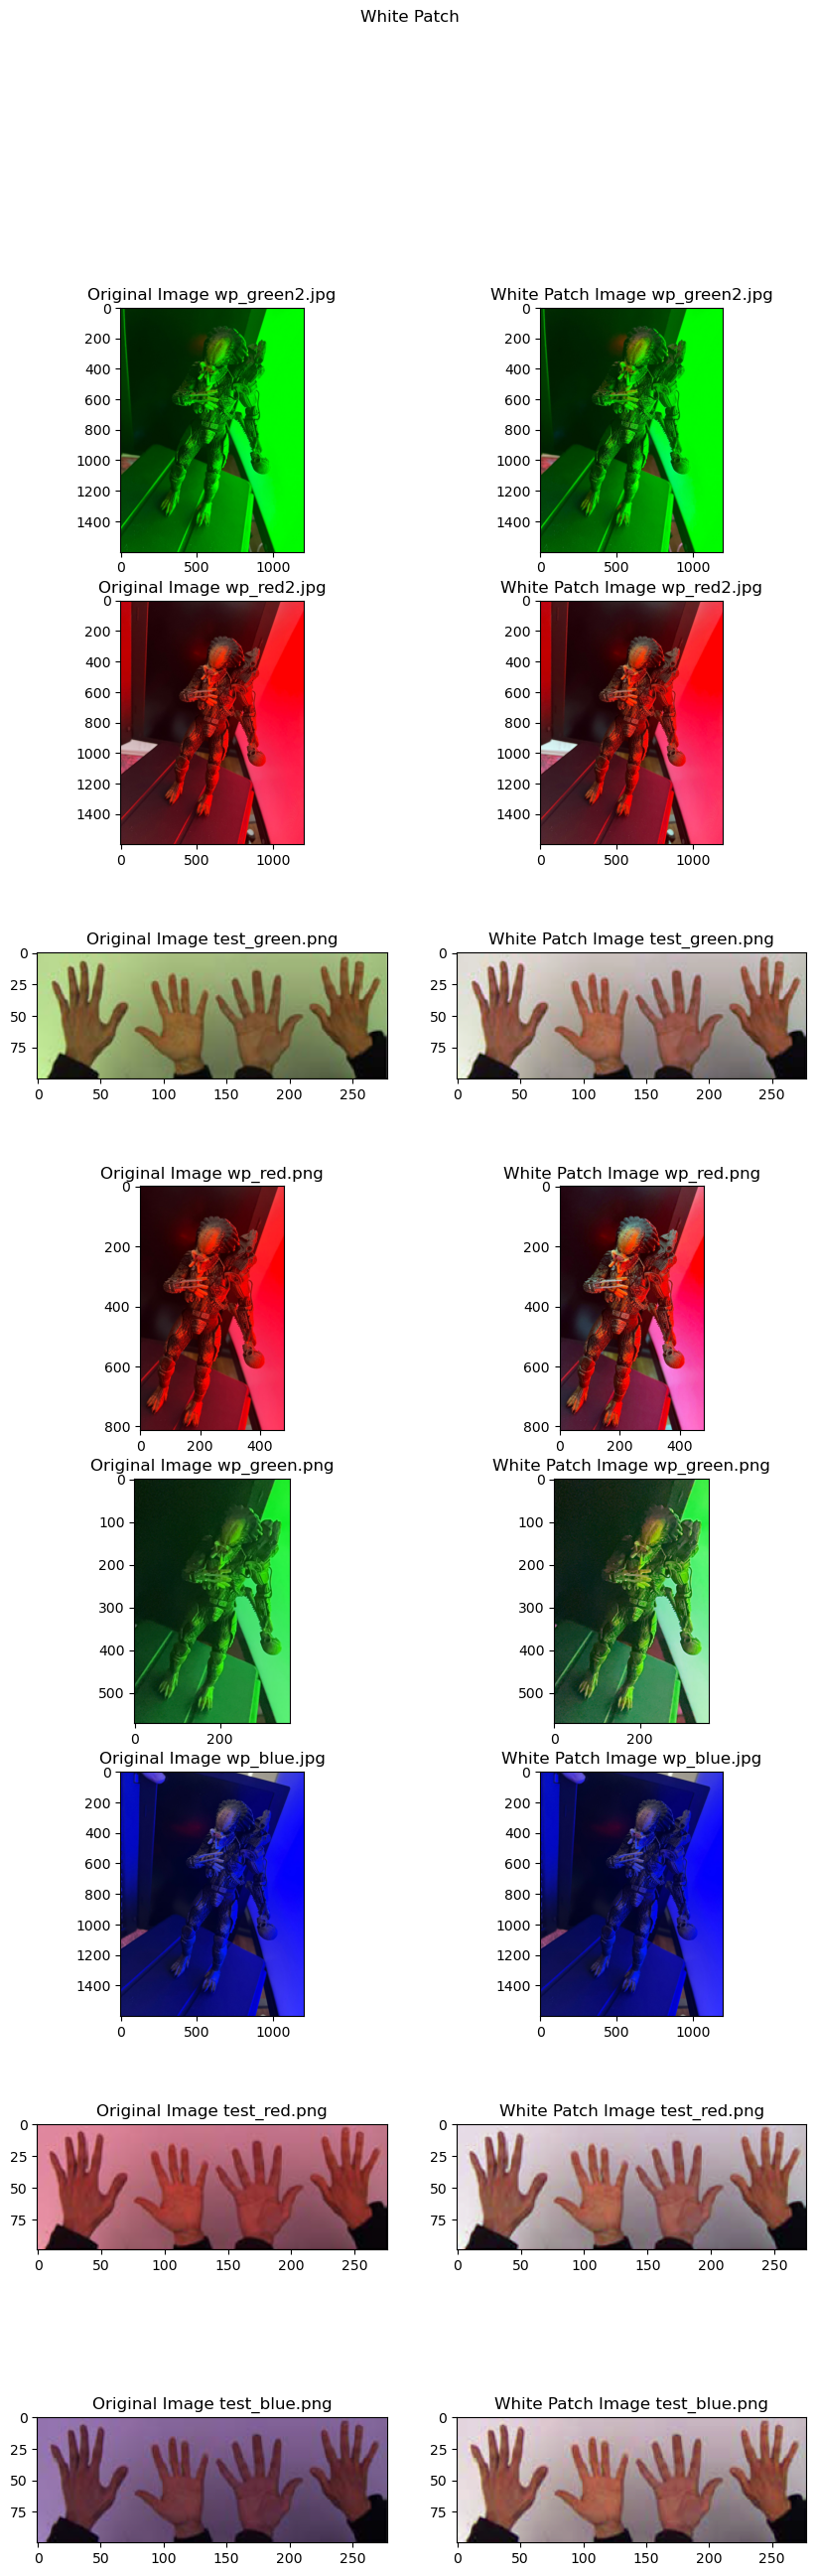

In [8]:
fig, axs = plt.subplots(len(filenames),2, figsize=(10,30))
fig.suptitle('White Patch')
count = 0
for file in filenames:
    dir_img = f"{directory}/{file}"
    image = cv.imread(dir_img)
    image = cv.cvtColor(image, cv.COLOR_BGR2RGB)
    
    axs[count, 0].imshow(image)
    axs[count, 0].set_title(f'Original Image {file}')
    axs[count, 1].imshow(white_patch(image))
    axs[count, 1].set_title(f'White Patch Image {file}')
    
    count +=1    
    
plt.show()

### Se puede ver para el algoritmo de white-patch, la imagen queda igual cuando el valor maximo de los tres canales de colores es el mismo


# Parte II

## 2.1

In [9]:
img1 = cv.imread('img1_tp.png', cv.IMREAD_GRAYSCALE) 
img2 = cv.imread('img2_tp.png', cv.IMREAD_GRAYSCALE)

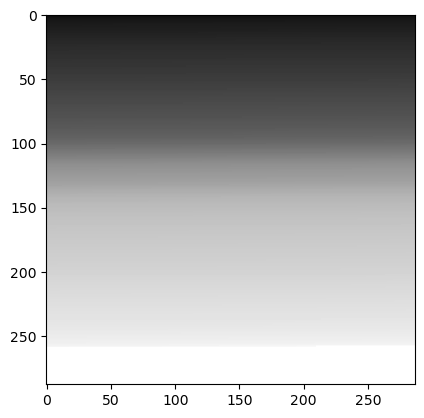

In [10]:
plt.imshow(img1, cmap='gray')
plt.show()

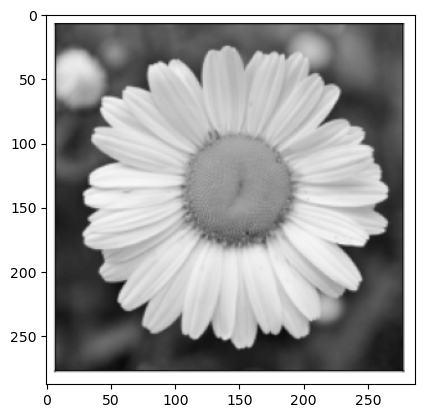

In [11]:
plt.imshow(img2, cmap='gray')

## 2.2

In [12]:
# https://www.analyticslane.com/2022/02/25/calcular-el-numero-optimo-de-bins-para-un-histograma/
def sturges(data):
    num_data = len(data)
    num_bins = int(np.log2(num_data)) + 1
    return num_bins

def freedman_diaconis(data):
    num_data = len(data)
    irq = np.percentile(data, 75) - np.percentile(data, 25)
    bin_width = 2 * irq / np.power(num_data, 1/3)
    num_bins = int((np.max(data) -  np.min(data)) / bin_width)  + 1
    return num_bins

In [13]:
nbins_img1 = freedman_diaconis(img1.ravel())
nbins_img2 = freedman_diaconis(img2.ravel())

In [14]:
print(f'bins img1 {nbins_img1}')
print(f'bins img2 {nbins_img2}')

bins img1 40
bins img2 40


In [36]:
hist1,bins1 = np.histogram(img1.ravel(),nbins_img1,[0,255])
print(bins1)
print(hist1)

hist2,bins2 = np.histogram(img2.ravel(),nbins_img2,[0,255])
print(bins2)
print(hist2)

[  0.      6.375  12.75   19.125  25.5    31.875  38.25   44.625  51.
  57.375  63.75   70.125  76.5    82.875  89.25   95.625 102.    108.375
 114.75  121.125 127.5   133.875 140.25  146.625 153.    159.375 165.75
 172.125 178.5   184.875 191.25  197.625 204.    210.375 216.75  223.125
 229.5   235.875 242.25  248.625 255.   ]
[   4  272  233  923 1574 1968 1938 2568 3027 2381 2645 2377 2503 2594
 1542 1320 1150  763  926  762  755  867 1020 1309 1670 1093 1045 1109
 1584 2521 3207 4252 5153 3452 4492 3788 2866 2202  401 8400]
[  0.      6.375  12.75   19.125  25.5    31.875  38.25   44.625  51.
  57.375  63.75   70.125  76.5    82.875  89.25   95.625 102.    108.375
 114.75  121.125 127.5   133.875 140.25  146.625 153.    159.375 165.75
 172.125 178.5   184.875 191.25  197.625 204.    210.375 216.75  223.125
 229.5   235.875 242.25  248.625 255.   ]
[   4  272  233  923 1574 1968 1938 2568 3027 2381 2645 2377 2503 2594
 1542 1320 1150  763  926  762  755  867 1020 1309 1670 1093 1045

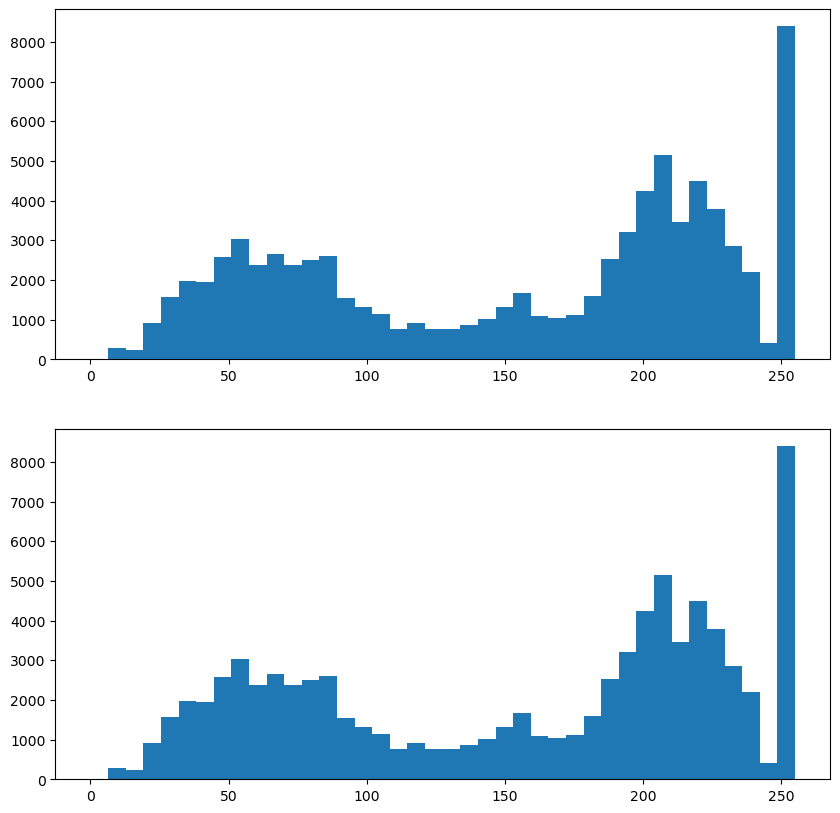

In [39]:
fig, axs = plt.subplots(2,1, figsize=(10,10))
axs[0].hist(img1.ravel(), bins=nbins_img1, range=[0, 255])
axs[1].hist(img2.ravel(), bins=nbins_img2, range=[0, 255])
plt.show()

- Para dividir el numero optimo de bins se uso la regla de Freedman–Diaconis, la distribución de grises de ambas imagenes es la misma, se ve unos picos tanto en los grises claros como en los grises oscuros.
- Los histogramas son similares en ambas imágenes por lo tanto no sería de utilidad como feature.


## 2.3

In [17]:
img_initial = cv.imread('segmentacion.png')

In [18]:
img_rgb = cv.cvtColor(img_initial, cv.COLOR_BGR2RGB)

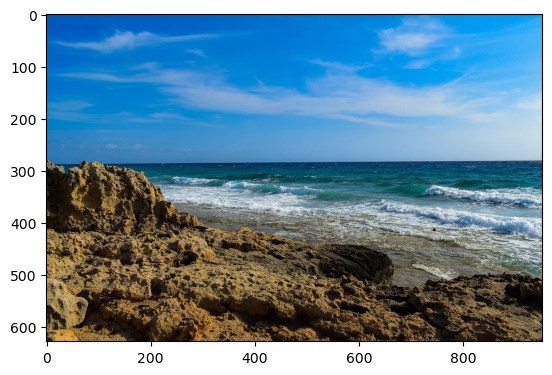

In [19]:
plt.imshow(img_rgb)
plt.show()

In [20]:
img_split = cv.split(img_rgb)

In [21]:
hist_size = freedman_diaconis(img_initial.ravel())

In [22]:
b_hist, bins_b = np.histogram(img_split[0].ravel(),hist_size,[0,256])
g_hist, bins_g = np.histogram(img_split[1].ravel(),hist_size,[0,256])
r_hist, bins_r = np.histogram(img_split[2].ravel(),hist_size,[0,256])

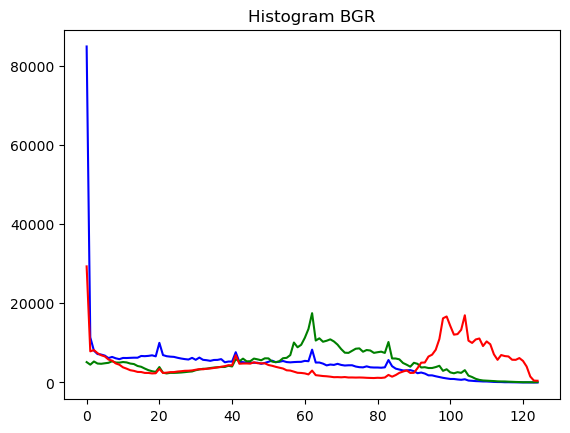

In [23]:
plt.figure()
plt.title("Histogram BGR")
plt.plot(b_hist, color = 'b')
plt.plot(g_hist, color = 'g')
plt.plot(r_hist, color = 'r')
plt.show()

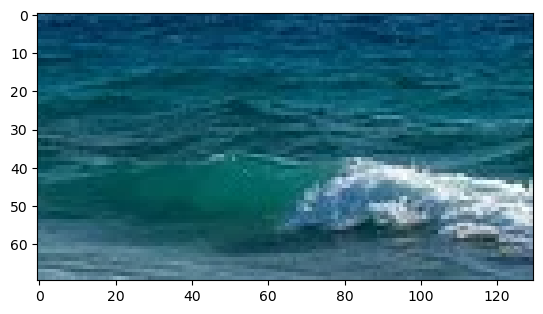

In [24]:
sample_water = img_rgb[290:360,660:790,:]
plt.imshow(sample_water)
plt.show()

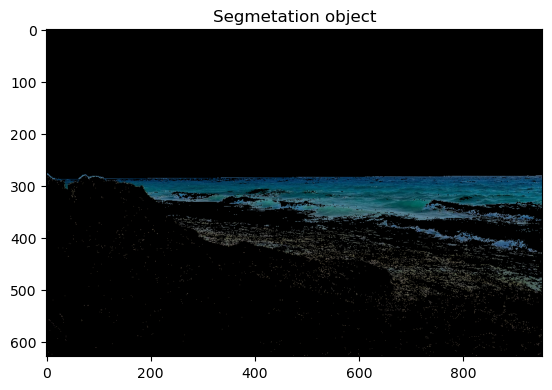

<function matplotlib.pyplot.show(close=None, block=None)>

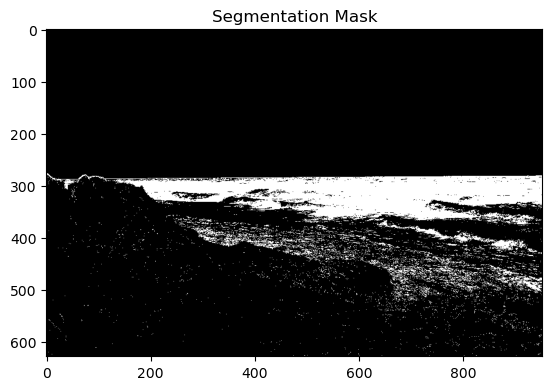

In [25]:
mean_color, std_color = cv.meanStdDev(sample_water)
sigma = 1.5
mask = cv.inRange(img_rgb, mean_color - std_color * sigma,  mean_color + std_color * sigma)
img_seg = cv.bitwise_and(img_rgb, img_rgb, mask=mask)

plt.imshow(img_seg)
plt.title('Segmetation object')
plt.show()

plt.imshow(mask,cmap='gray')
plt.title('Segmentation Mask')
plt.show

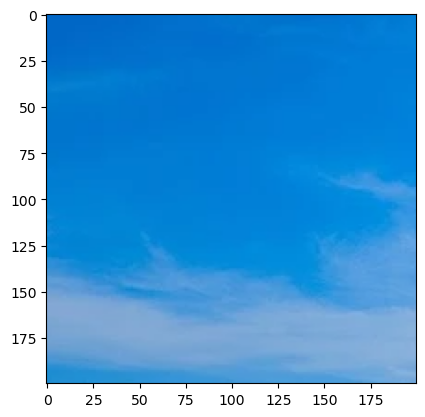

In [26]:
sample_sky = img_rgb[0:200,350:550,:]
plt.imshow(sample_sky)
plt.show()

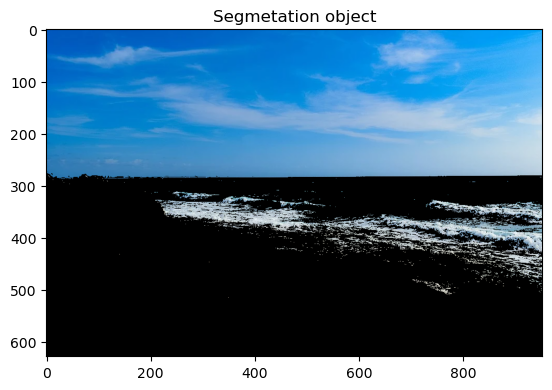

<function matplotlib.pyplot.show(close=None, block=None)>

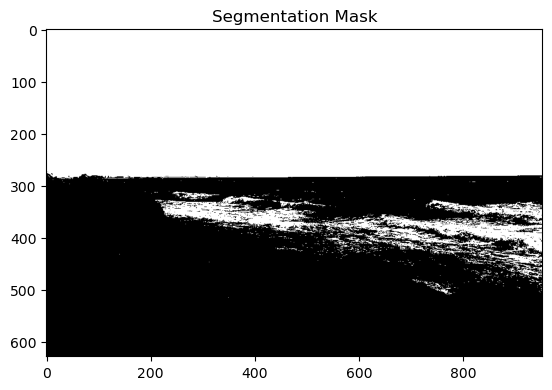

In [27]:
mean_color, std_color = cv.meanStdDev(sample_sky)
sigma =7
mask = cv.inRange(img_rgb, mean_color - std_color * sigma,  mean_color + std_color * sigma)
img_seg = cv.bitwise_and(img_rgb, img_rgb, mask=mask)

plt.imshow(img_seg)
plt.title('Segmetation object')
plt.show()

plt.imshow(mask,cmap='gray')
plt.title('Segmentation Mask')
plt.show

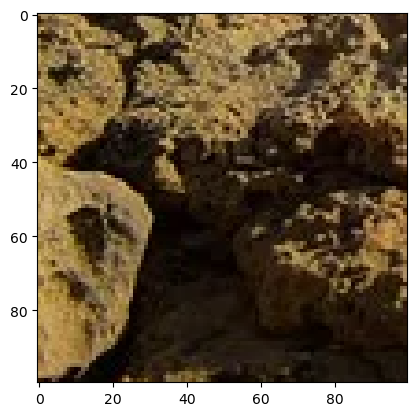

In [28]:
sample_land = img_rgb[500:600,50:150,:]
plt.imshow(sample_land)
plt.show()

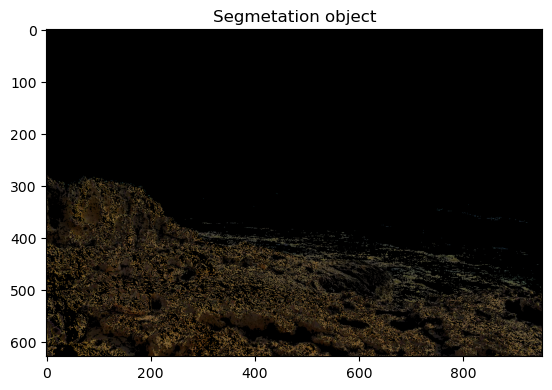

<function matplotlib.pyplot.show(close=None, block=None)>

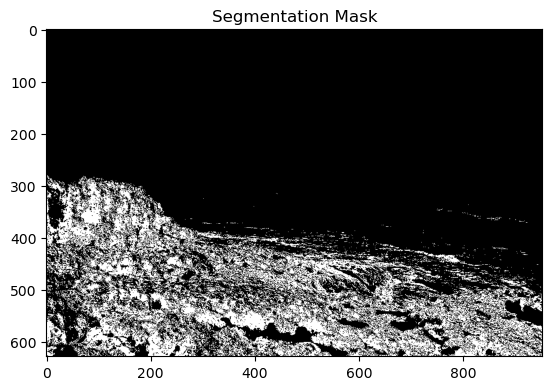

In [29]:
mean_color, std_color = cv.meanStdDev(sample_land)
sigma = 1
mask = cv.inRange(img_rgb, mean_color - std_color * sigma,  mean_color + std_color * sigma)
img_seg = cv.bitwise_and(img_rgb, img_rgb, mask=mask)

plt.imshow(img_seg)
plt.title('Segmetation object')
plt.show()

plt.imshow(mask,cmap='gray')
plt.title('Segmentation Mask')
plt.show